Sentiment Analysis on GB Comments

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
comments=pd.read_csv('F:\PRACTICE\Dataset/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [4]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [5]:
!pip install textblob

In [6]:
from textblob import TextBlob

In [7]:
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity

0.45000000000000007

In [8]:
comments.isna().sum() #summation of all missing comments

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [9]:
comments.dropna(inplace = True) #removing all missing comments, inplace updates the dataframe

In [10]:
polarity = []
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [11]:
comments['polarity'] = polarity

In [12]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


Wordcloud Representation of Sentiments

Positive Polarity

In [13]:
comments_positive = comments[comments['polarity']==1] #filtering for only positive coomets

In [14]:
comments_positive.shape #no. of rows and columns

(20400, 5)

In [15]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [16]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud, STOPWORDS

Stopwords are like he, she. They make no sense in all my analysis.

In [18]:
stopwords = set(STOPWORDS)

In [19]:
total_comments = ' '.join(comments_positive['comment_text'])

In [20]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

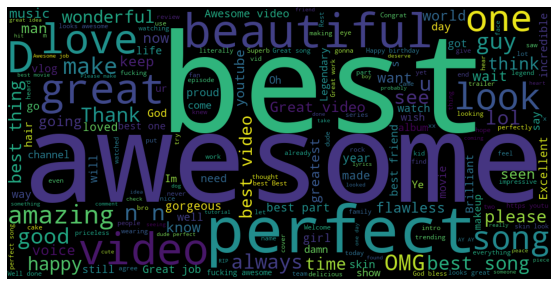

In [21]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Negative Polarity

In [22]:
comments_negative = comments[comments['polarity']==-1] #filtering for only negative coomets

In [23]:
comments_negative.shape #no. of rows and columns

(3339, 5)

In [24]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
1387,ql0Op1VcELw,boring,0,0,-1.0
1394,ql0Op1VcELw,0:22 **laughs at terrible pun**,1,1,-1.0
1530,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
1745,F2uJvwiSZAQ,People making jokes about 9/11 is truly disgus...,1,0,-1.0
1793,F2uJvwiSZAQ,Thats insane.,0,0,-1.0


In [25]:
from wordcloud import WordCloud, STOPWORDS

In [26]:
stopwords = set(STOPWORDS)

In [27]:
total_comments = ' '.join(comments_negative['comment_text'])

In [28]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

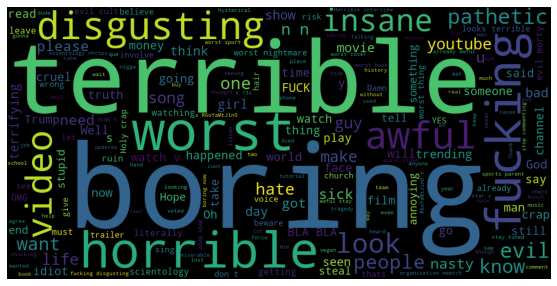

In [29]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')